In [59]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
font = {'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)
import os
from adjustText import adjust_text as atext

import warnings
warnings.filterwarnings('ignore')

# Auge

In [60]:
def grid(tick=False):
    plt.minorticks_on()
    plt.grid(which='major',
            color = 'k', 
            linewidth = 0.5,
            linestyle = '--',
            alpha = 0.5)
    plt.grid(which='minor', 
            color = 'k', 
            linewidth = 0.2,
            linestyle = ':',
            alpha = 0.3)
    if tick:
        plt.tick_params(axis = 'both',
               direction = 'in',                #  Рисуем деления внутри и снаружи графика
               length = 5,                      #  Длина делений
               width = 1.5,                     #  Ширина делений
               pad = 10,                        #  Расстояние между черточкой и ее подписью
               labelsize = 17,                  #  Размер подписи
               labelcolor = 'k',                #  Цвет подписи
               bottom = True,                   #  Рисуем метки снизу
               top = False,                     #  сверху
               left = True,                     #  слева
               right = True)                    #  и справа

In [61]:
data_1 = pd.read_csv('Auge data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=float, skipfooter=3)
data_1.head()

,E,der
0,40.028,-380.8
1,40.251,-383.2
2,40.474,-381.3
3,40.698,-374.1
4,40.921,-362.6


In [62]:
data_2 = pd.read_csv('Auge data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=float, skipfooter=3)
data_2.head()

,E,der
0,1000.012,-56.5
1,1000.235,-57.2
2,1000.458,-58.3
3,1000.682,-62.9
4,1000.905,-55.5


In [63]:
data_3 = pd.read_csv('Auge data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=float, skipfooter=3)
data_3.head()

,E,der
0,19.957,-517.8
1,20.181,-601.0
2,20.404,-596.8
3,20.627,-567.5
4,20.851,-528.0


In [64]:
data_4 = pd.concat((data_1, data_2))
data_4.head()

,E,der
0,40.028,-380.8
1,40.251,-383.2
2,40.474,-381.3
3,40.698,-374.1
4,40.921,-362.6


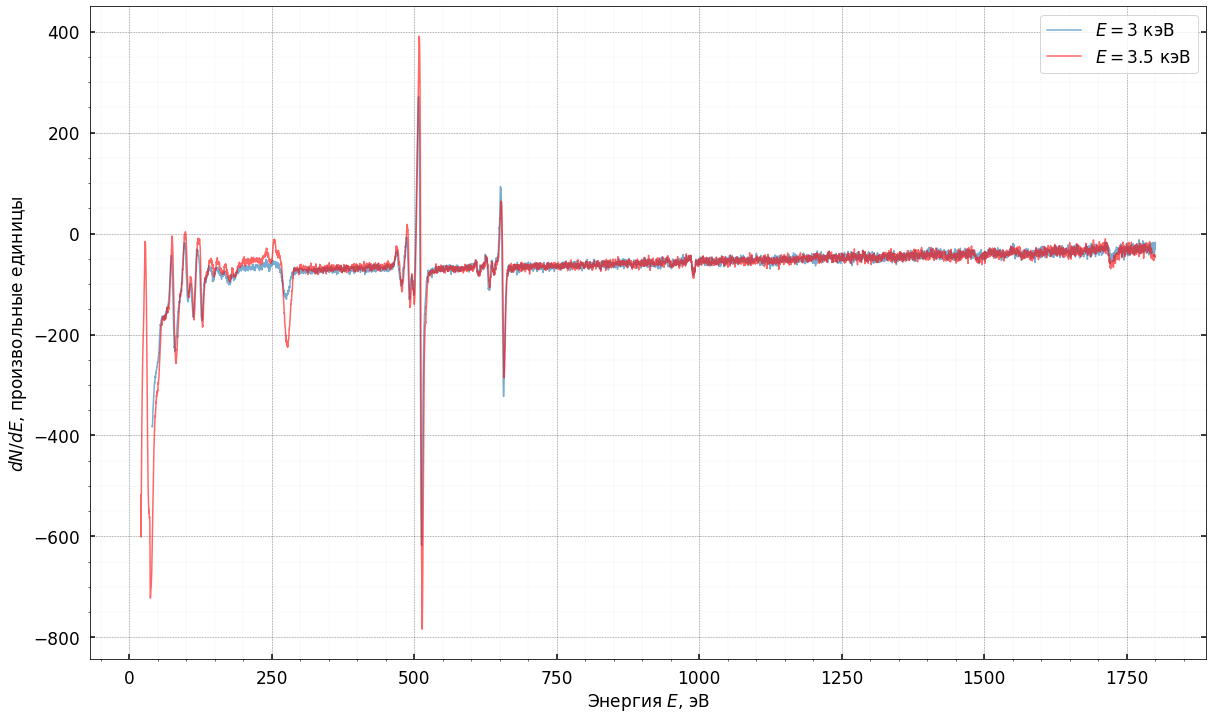

In [65]:
plt.figure(figsize=(20, 12))


plt.plot(data_4['E'].values, data_4['der'].values, alpha=0.6, label='$E=3$ кэВ')
plt.plot(data_3['E'].values, data_3['der'].values, color='red', alpha=0.6, label='$E=3.5$ кэВ')

plt.xlabel('Энергия $E$, эВ')
plt.ylabel('$dN/dE$, произвольные единицы')
# plt.title('Сравнение оже-спектров, снятых при $E = 3$ кэВ and $E = 3.5$ кэВ')
plt.legend()

grid(tick=True)
plt.savefig('Report/Pictures/1_Auge_double.pdf', bbox_inches='tight')

plt.show()

In [66]:
# Trying to filter some shit
from scipy.signal import lfilter

n = 25  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

from scipy.signal import find_peaks

## 3000 eV

In [67]:
indexes = find_peaks(-1 * lfilter(b, a, data_4['der'].values), height=30, prominence=15, threshold=0)[0]
data_4['E'].values[indexes], indexes

(array([  45.387,   83.124,  114.386,  130.24 ,  150.337,  177.356,
         277.616,  479.477,  495.108,  515.874,  614.795,  633.552,
         659.901,  992.614, 1725.505]),
 array([  24,  193,  333,  404,  494,  615, 1064, 1968, 2038, 2131, 2574,
        2658, 2776, 4266, 7549]))

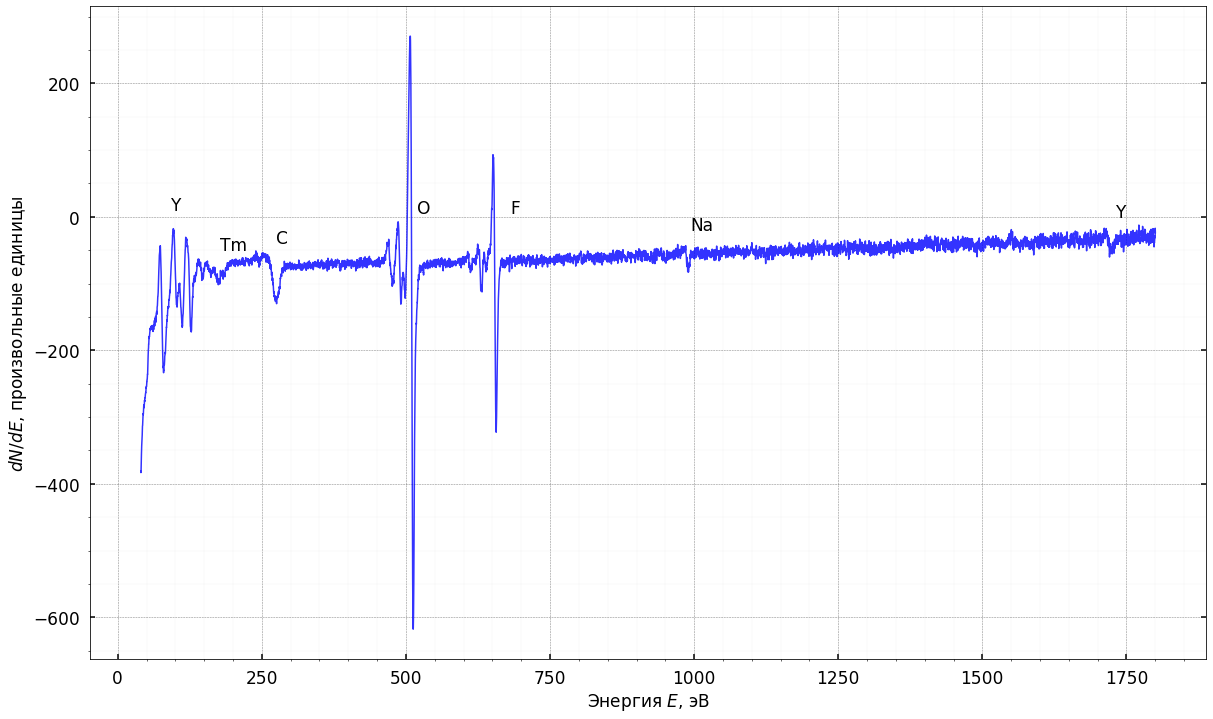

In [68]:
plt.figure(figsize=(20, 12))

##plt.plot(data_4['E'].values, lfilter(b, a, data_4['der'].values), color='black')
plt.plot(data_4['E'].values, data_4['der'].values, color='blue', alpha=0.8)

##plt.plot(data_4['E'].values[indexes], lfilter(b, a, data_4['der'].values)[indexes], 'o')

#plt.plot(data_4['E'].values[indexes][7:10], lfilter(b, a, data_4['der'].values)[indexes][7:10], 'o', color='orange') # Oxygen

#plt.plot(data_4['E'].values[indexes][6], lfilter(b, a, data_4['der'].values)[indexes][6], 'o', color='blue') # Carbon

#plt.plot(data_4['E'].values[indexes][10:13], lfilter(b, a, data_4['der'].values)[indexes][10:13], 'o', color='purple') # Fluorine

#plt.plot(data_4['E'].values[indexes][13], lfilter(b, a, data_4['der'].values)[indexes][13], 'o', color='red') # Sodium
##plt.plot(data_4['E'].values[indexes][0], lfilter(b, a, data_4['der'].values)[indexes][0], 'o', color='red') # Sodium

#plt.plot(data_4['E'].values[indexes][1:5], lfilter(b, a, data_4['der'].values)[indexes][1:5], 'o', color='green') # Yttrium
#plt.plot(data_4['E'].values[indexes][-1], lfilter(b, a, data_4['der'].values)[indexes][-1], 'o', color='green') # Yttrium

#plt.plot(data_4['E'].values[indexes][5], lfilter(b, a, data_4['der'].values)[indexes][5], 'o', color='black')
##plt.plot(1492, -50, 'o', color='black')

##atext([plt.text(1492-5, -50-50, 1492)], color='orange')

##x_temp = data_4['E'].values[indexes]
##texts = [plt.text(x_temp[i] - 5, lfilter(b, a, data_4['der'].values)[indexes][i] - 50, round(x_temp[i])) for i in range(1, len(x_temp))]
##atext(texts, color='orange')

plt.annotate('C', (275, -40), color='black')
plt.annotate('O', (510 + 10, 5), color='black')
plt.annotate('F', (652 + 30, 5), color='black')
plt.annotate('Na', (993, -20), color='black')
plt.annotate('Y', (120-30, +10), color='black')
plt.annotate('Y', (1730, 0), color='black')
plt.annotate('Tm', (177, -50), color='black')
#plt.annotate('Tm', (1492-30, 0), color='black')

plt.xlabel('Энергия $E$, эВ')
plt.ylabel('$dN/dE$, произвольные единицы')
#plt.title('Оже-спектр при $E = 3$ кэВ')

#plt.xticks((83, 177, 275, 513, 657, 989, 1722))


grid(tick=True)

plt.savefig('Report/Pictures/1_Auge_3000.pdf', bbox_inches='tight')
plt.show()

## 3500 eV

In [69]:
indexes_3 = find_peaks(-1 * lfilter(b, a, data_3['der'].values), height=30, prominence=15, threshold=0)[0]
data_3['E'].values[indexes].round()#, indexes

array([  25.,   63.,   94.,  110.,  130.,  157.,  258.,  459.,  475.,
        496.,  595.,  613.,  640.,  973., 1706.])

In [70]:
data_3['der'].values[4355] / data_3['der'].values[92] * 100

12.88141470180305

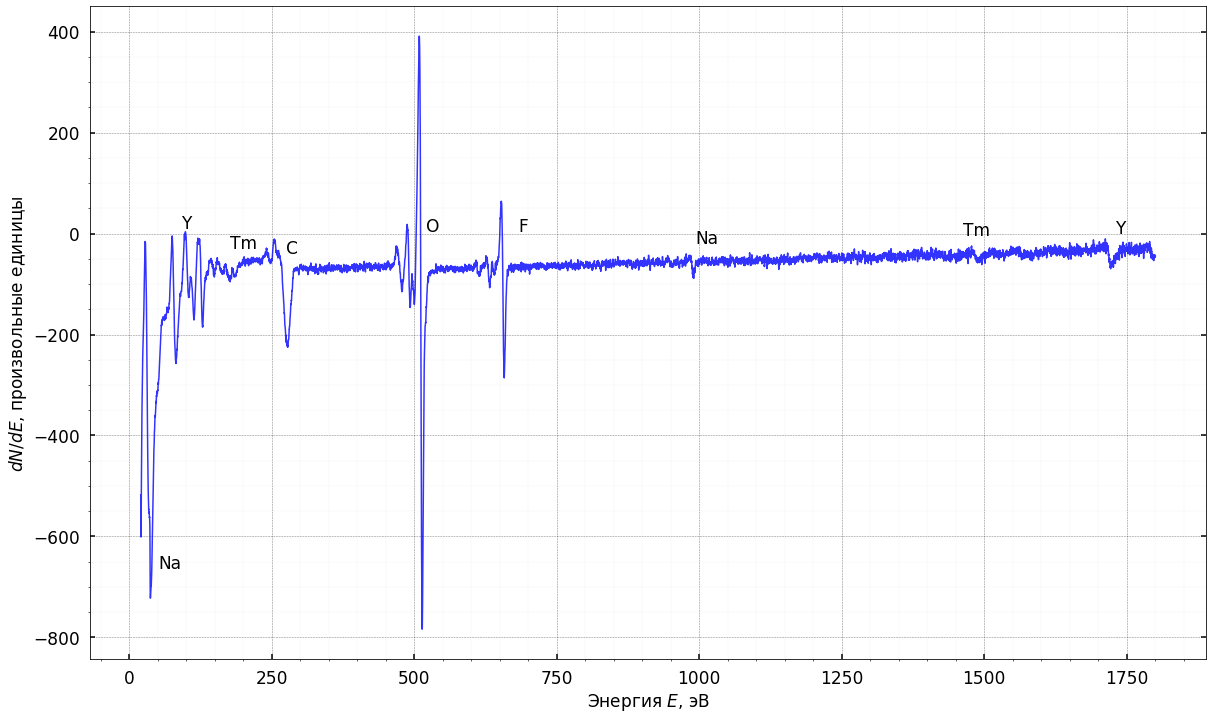

In [71]:
plt.figure(figsize=(20, 12))

plt.plot(data_3['E'].values, data_3['der'].values, color='blue', alpha=0.8)

##plt.plot([data_3['E'].values[indexes_3][i] for i in [1, -2]], [lfilter(b, a, data_3['der'].values)[indexes_3][i] for i in [1, -2]], 'o')

#plt.plot(data_3['E'].values[indexes_3][1], lfilter(b, a, data_3['der'].values)[indexes_3][1], 'o', color='red')
#plt.plot(data_3['E'].values[indexes_3][-2], lfilter(b, a, data_3['der'].values)[indexes_3][-2], 'o', color='black')

plt.annotate('Na', (data_3['E'].values[indexes_3][1] + 10, lfilter(b, a, data_3['der'].values)[indexes_3][1] - 10), color='black')
##plt.annotate('41', (data_3['E'].values[indexes][1] - 10, lfilter(b, a, data_3['der'].values)[indexes][1] - 50))

plt.annotate('Tm', (data_3['E'].values[indexes_3][-2] - 30, lfilter(b, a, data_3['der'].values)[indexes_3][-2] +50), color='black')
##plt.annotate('1492', (data_3['E'].values[indexes][-2] - 10, lfilter(b, a, data_3['der'].values)[indexes][-2]- 50))

# From 3keV

#plt.plot(data_4['E'].values[indexes][7:10], lfilter(b, a, data_4['der'].values)[indexes][7:10], 'o', color='orange') # Oxygen
#
#plt.plot(data_4['E'].values[indexes][6], lfilter(b, a, data_4['der'].values)[indexes][6]-100, 'o', color='blue') # Carbon
#
#plt.plot(data_4['E'].values[indexes][10:13], lfilter(b, a, data_4['der'].values)[indexes][10:13], 'o', color='purple') # Fluorine
#
#plt.plot(data_4['E'].values[indexes][13], lfilter(b, a, data_4['der'].values)[indexes][13], 'o', color='red') # Sodium
###plt.plot(data_4['E'].values[indexes][0], lfilter(b, a, data_4['der'].values)[indexes][0], 'o', color='red') # Sodium
#
#plt.plot(data_4['E'].values[indexes][1:5], lfilter(b, a, data_4['der'].values)[indexes][1:5] - [100, 40, 70, 10], 'o', color='green') # Yttrium
#plt.plot(data_4['E'].values[indexes][-1], lfilter(b, a, data_4['der'].values)[indexes][-1], 'o', color='green') # Yttrium
#
#plt.plot(data_4['E'].values[indexes][5], lfilter(b, a, data_4['der'].values)[indexes][5], 'o', color='black')

plt.annotate('C', (275, -40), color='black')
plt.annotate('O', (510 + 10, 5), color='black')
plt.annotate('F', (652 + 30, 5), color='black')
plt.annotate('Na', (993, -20), color='black')
plt.annotate('Y', (120-30, +10), color='black')
plt.annotate('Y', (1730, 0), color='black')
plt.annotate('Tm', (177, -30), color='black')

#plt.xticks((40, 83, 177, 275, 513, 657, 989, 1492, 1722))

plt.xlabel('Энергия $E$, эВ')
plt.ylabel('$dN/dE$, произвольные единицы')
#plt.title('Оже-спектр при $E = 3.5$ кэВ')


grid(tick=True)

plt.savefig('Report/Pictures/1_Auge_3500.pdf', bbox_inches='tight')
plt.show()